In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# tf and tf.keras
import tensorflow as tf 
from tensorflow import keras

# anthor lib
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [2]:
# data
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 5s 1us/step


In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
len(train_labels)

60000

In [18]:
test_images.shape

(10000, 28, 28)

In [21]:
len(test_labels)

10000

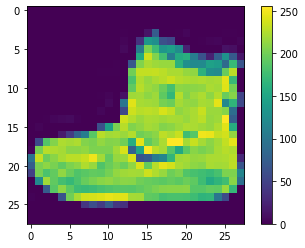

In [22]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [23]:
train_images = train_images / 255.0
test_images = test_images / 255.0

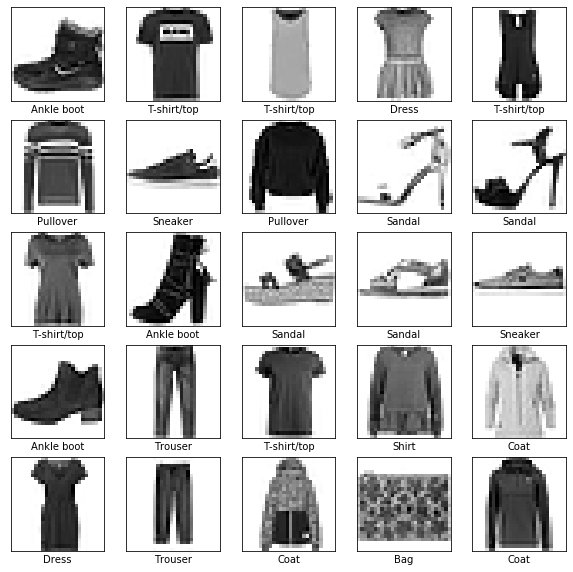

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),# 格式化数组 将28*28数组，转换成一维数组
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [28]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4988 - accuracy: 0.8241
Epoch 2/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3798 - accuracy: 0.8623
Epoch 3/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3394 - accuracy: 0.8765
Epoch 4/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3148 - accuracy: 0.8846
Epoch 5/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2959 - accuracy: 0.8900
Epoch 6/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2798 - accuracy: 0.8966
Epoch 7/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2644 - accuracy: 0.9013
Epoch 8/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2547 - accuracy: 0.9053
Epoch 9/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2460 - accuracy: 0.9085
Epoch 10/10
60

In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/1 - 0s - loss: 0.2687 - accuracy: 0.8828


In [35]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8828


In [36]:
# Make prediction
predictions = model.predict(test_images)

In [37]:
predictions.shape

(10000, 10)

In [38]:
predictions[0]

array([8.6471988e-07, 6.5332885e-11, 1.0484241e-07, 8.2917007e-10,
       5.1592299e-09, 1.9575818e-03, 4.0573309e-07, 9.9075837e-03,
       1.4359529e-06, 9.8813194e-01], dtype=float32)

In [39]:
np.argmax(predictions[0])

9

In [40]:
test_labels[0]

9

In [42]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

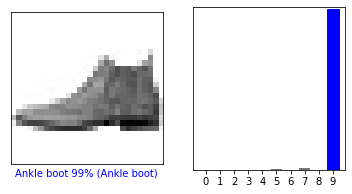

In [43]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

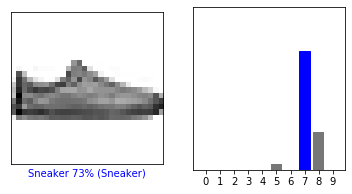

In [44]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

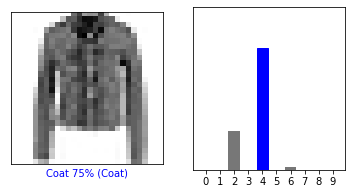

In [45]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

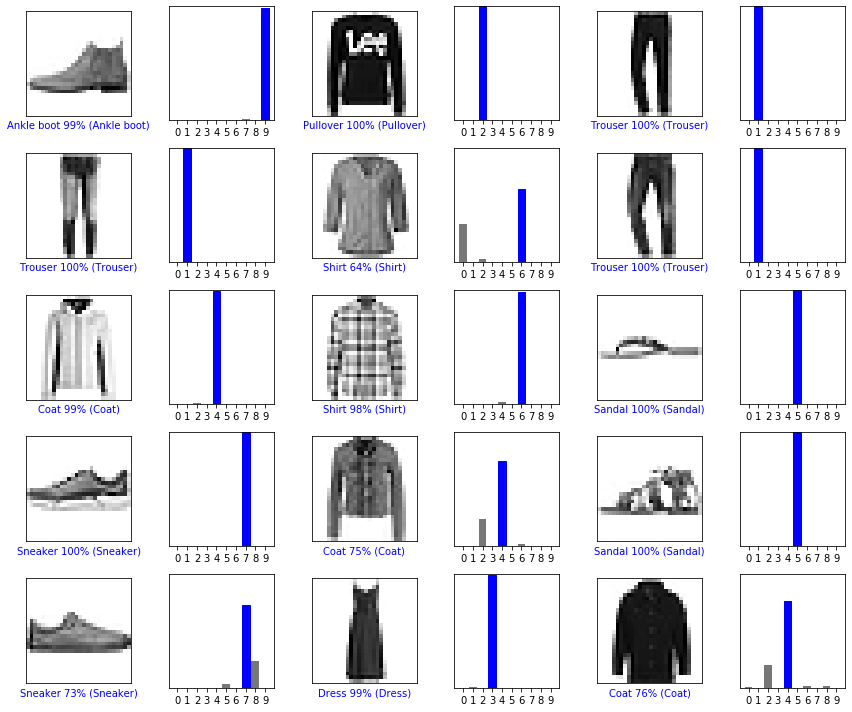

In [46]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
    
plt.tight_layout()
plt.show()

In [47]:
img = test_images[0]
print(img.shape)

(28, 28)


In [48]:
img = (np.expand_dims(img, 0))

In [49]:
preditcitions_single = model.predict(img)
print(preditcitions_single)

[[8.6471817e-07 6.5332628e-11 1.0484241e-07 8.2916846e-10 5.1592197e-09
  1.9575800e-03 4.0573269e-07 9.9075837e-03 1.4359515e-06 9.8813194e-01]]


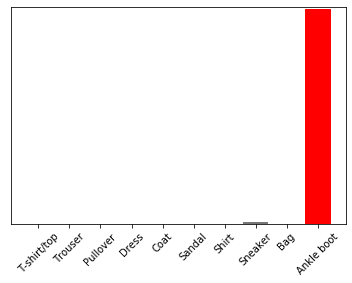

In [53]:
plot_value_array(1, preditcitions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [55]:
np.argmax(preditcitions_single[0])

9